## Diabetes Diagnostic
- Link: https://www.kaggle.com/houcembenmansour/predict-diabetes-based-on-diagnostic-measures

# Data Analysis

In [2]:
#!pip install -U imbalanced-learn

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
data = pd.read_csv('diabetes.csv')

Before making anything like feature selection, feature extraction and classification, we start with basic data analysis. 
Lets look at features of data.

In [4]:
display(data)  # head method shows only first 5 rows

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,227,105,44,"5,2",83,female,59,125,"25,2",150,90,35,40,"0,88",No diabetes
386,387,226,279,52,"4,3",84,female,60,192,"37,5",144,88,41,48,"0,85",Diabetes
387,388,301,90,118,"2,6",89,female,61,115,"21,7",218,90,31,41,"0,76",No diabetes
388,389,232,184,114,2,91,female,61,127,24,170,82,35,38,"0,92",Diabetes


# Vamos fazer uma cópia do Dataframe

In [5]:
df = data.copy()

In [6]:
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


# Vamos converter a classe para número

In [7]:
#Mas antes vamos ver a distribuição
df['diabetes'].value_counts()

No diabetes    330
Diabetes        60
Name: diabetes, dtype: int64

In [8]:
dicionario = {'No diabetes':0, 'Diabetes':1}
df['diabetes'] = df['diabetes'].map(dicionario) 

In [9]:
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",0
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",0
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",0
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",0
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",0


# Vamos converter o Gênero

In [10]:
df = pd.concat([df,pd.get_dummies(df['gender'], prefix='gender')],axis=1)
df.drop(['gender'],axis=1, inplace=True)

In [11]:
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes,gender_female,gender_male
0,1,193,77,49,"3,9",19,61,119,"22,5",118,70,32,38,"0,84",0,1,0
1,2,146,79,41,"3,6",19,60,135,"26,4",108,58,33,40,"0,83",0,1,0
2,3,217,75,54,4,20,67,187,"29,3",110,72,40,45,"0,89",0,1,0
3,4,226,97,70,"3,2",20,64,114,"19,6",122,64,31,39,"0,79",0,1,0
4,5,164,91,67,"2,4",20,70,141,"20,2",122,86,32,39,"0,82",0,1,0


# Converter a vírgula pelo ponto

In [12]:
df['chol_hdl_ratio'] = df['chol_hdl_ratio'].str.replace(',', '.')

In [13]:
df['bmi'] = df['bmi'].str.replace(',', '.')

In [14]:
df['waist_hip_ratio'] = df['waist_hip_ratio'].str.replace(',','.')

In [15]:
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes,gender_female,gender_male
0,1,193,77,49,3.9,19,61,119,22.5,118,70,32,38,0.84,0,1,0
1,2,146,79,41,3.6,19,60,135,26.4,108,58,33,40,0.83,0,1,0
2,3,217,75,54,4,20,67,187,29.3,110,72,40,45,0.89,0,1,0
3,4,226,97,70,3.2,20,64,114,19.6,122,64,31,39,0.79,0,1,0
4,5,164,91,67,2.4,20,70,141,20.2,122,86,32,39,0.82,0,1,0


## Remoção de atributos irrelevantes

In [16]:
# feature names as an Index (panda object including a list of column names and dtype)
col = df.columns       # .columns gives columns names in data 
print(col)

Index(['patient_number', 'cholesterol', 'glucose', 'hdl_chol',
       'chol_hdl_ratio', 'age', 'height', 'weight', 'bmi', 'systolic_bp',
       'diastolic_bp', 'waist', 'hip', 'waist_hip_ratio', 'diabetes',
       'gender_female', 'gender_male'],
      dtype='object')


In [17]:
df.columns

Index(['patient_number', 'cholesterol', 'glucose', 'hdl_chol',
       'chol_hdl_ratio', 'age', 'height', 'weight', 'bmi', 'systolic_bp',
       'diastolic_bp', 'waist', 'hip', 'waist_hip_ratio', 'diabetes',
       'gender_female', 'gender_male'],
      dtype='object')

In [18]:
X = df.drop(['patient_number','diabetes'],axis = 1)
y = df['diabetes']  

In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [20]:
X

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,gender_female,gender_male
0,193,77,49,3.9,19,61,119,22.5,118,70,32,38,0.84,1,0
1,146,79,41,3.6,19,60,135,26.4,108,58,33,40,0.83,1,0
2,217,75,54,4,20,67,187,29.3,110,72,40,45,0.89,1,0
3,226,97,70,3.2,20,64,114,19.6,122,64,31,39,0.79,1,0
4,164,91,67,2.4,20,70,141,20.2,122,86,32,39,0.82,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,227,105,44,5.2,83,59,125,25.2,150,90,35,40,0.88,1,0
386,226,279,52,4.3,84,60,192,37.5,144,88,41,48,0.85,1,0
387,301,90,118,2.6,89,61,115,21.7,218,90,31,41,0.76,1,0
388,232,184,114,2,91,61,127,24,170,82,35,38,0.92,1,0


### Verifica se há dados faltantes

In [21]:
#check if there is a NaN value in our data frame x, a False indicates there are no missing values
X.isnull().values.any()

False

## Distruição das amostras entre as classes

In [22]:
y.value_counts()

0    330
1     60
Name: diabetes, dtype: int64

No Diabetes:  330
Diabetes :  60


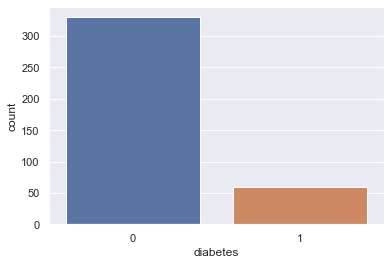

In [23]:
sns.set(style="darkgrid")
ax = sns.countplot(x = y)       # M = 212, B = 357
N, S = y.value_counts(sort=True) #sort=True (default) in order to be sure B, M are in the right order (alphabetical)
print('No Diabetes: ',N)
print('Diabetes : ',S)

# Balancemaneto das classes

In [24]:
smt = SMOTE()
X,y = smt.fit_resample(X,y) 

# Rever a distruição das amostras entre as classes

No Diabetes:  330
Diabetes :  330


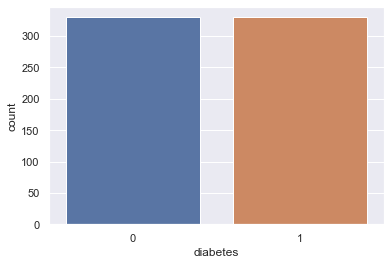

In [25]:
sns.set(style="darkgrid")
ax = sns.countplot(x = y)       # M = 212, B = 357
N, S = y.value_counts(sort=True) #sort=True (default) in order to be sure B, M are in the right order (alphabetical)
print('No Diabetes: ',N)
print('Diabetes : ',S)

Let's now use the describe function in order to look at our features :

In [26]:
X

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,gender_female,gender_male
0,193,77,49,3.9,19,61,119,22.5,118,70,32,38,0.84,1,0
1,146,79,41,3.6,19,60,135,26.4,108,58,33,40,0.83,1,0
2,217,75,54,4.0,20,67,187,29.3,110,72,40,45,0.89,1,0
3,226,97,70,3.2,20,64,114,19.6,122,64,31,39,0.79,1,0
4,164,91,67,2.4,20,70,141,20.2,122,86,32,39,0.82,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,209,242,37,6.494176,55,64,189,32.083046,136,90,39,45,0.867028,1,0
656,199,175,27,7.309522,60,68,211,32.066672,115,58,42,48,0.882857,0,0
657,252,120,36,6.982477,61,67,168,25.982299,159,113,36,39,0.913345,0,1
658,224,201,65,3.729297,68,63,163,28.879553,150,81,33,41,0.806796,1,0


In [27]:
X.shape

(660, 15)

## Mapa de calor com a correlação entre os atributos

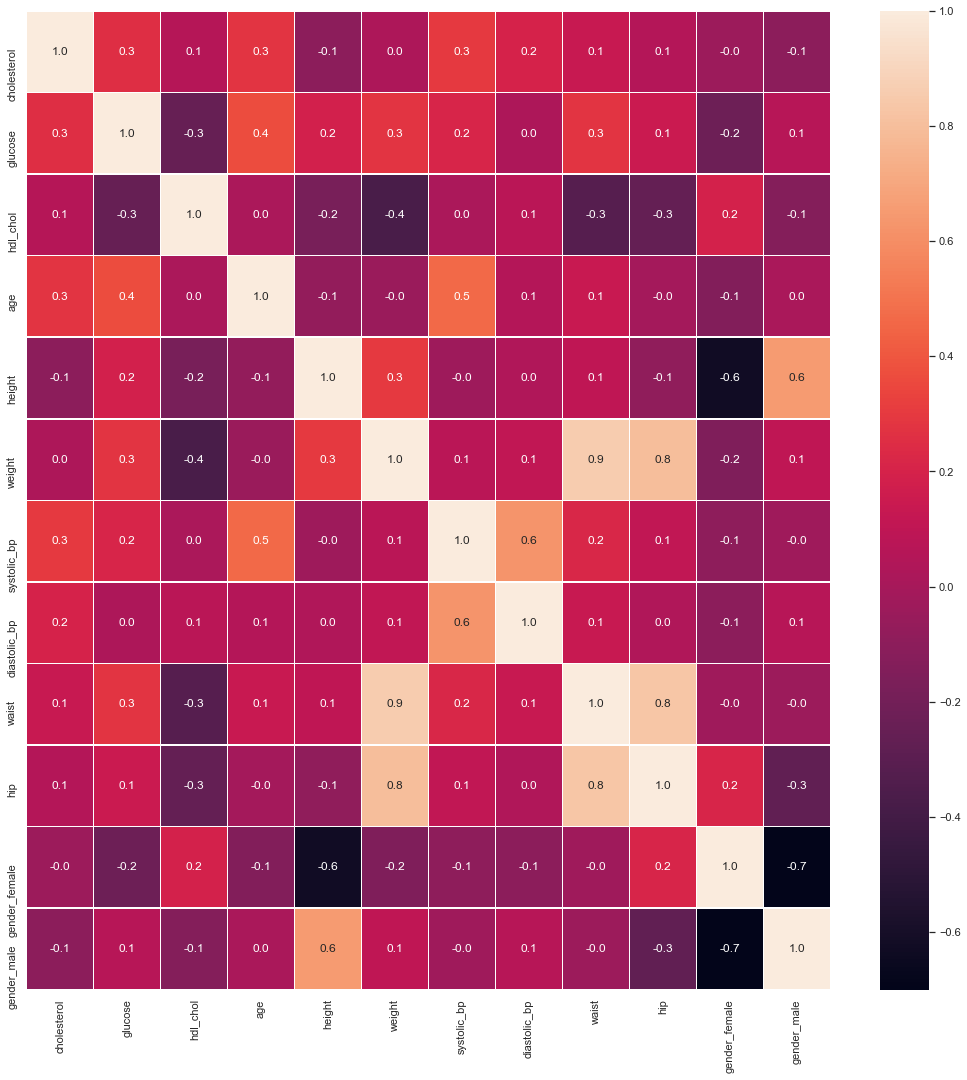

In [28]:
#correlation map
#pearson coeficiente de correlação
f,ax = plt.subplots(figsize=(18, 18))
ax = sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Normalização dos dados

In [29]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
data_normal = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [30]:
data_normal

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,gender_female,gender_male
0,0.315068,0.086053,0.342593,0.134831,0.000000,0.375000,0.088496,0.179803,0.17500,0.289474,0.200000,0.235294,0.347826,1.0,0.0
1,0.186301,0.091988,0.268519,0.117978,0.000000,0.333333,0.159292,0.275862,0.11250,0.131579,0.233333,0.294118,0.326087,1.0,0.0
2,0.380822,0.080119,0.388889,0.140449,0.013699,0.625000,0.389381,0.347291,0.12500,0.315789,0.466667,0.441176,0.456522,1.0,0.0
3,0.405479,0.145401,0.537037,0.095506,0.013699,0.500000,0.066372,0.108374,0.20000,0.210526,0.166667,0.264706,0.239130,1.0,0.0
4,0.235616,0.127596,0.509259,0.050562,0.013699,0.750000,0.185841,0.123153,0.20000,0.500000,0.200000,0.264706,0.304348,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.358904,0.575668,0.231481,0.280572,0.493151,0.500000,0.398230,0.415839,0.28750,0.552632,0.433333,0.441176,0.406582,1.0,0.0
656,0.331507,0.376855,0.138889,0.326378,0.561644,0.666667,0.495575,0.415435,0.15625,0.131579,0.533333,0.529412,0.440993,0.0,0.0
657,0.476712,0.213650,0.222222,0.308004,0.575342,0.625000,0.305310,0.265574,0.43125,0.855263,0.333333,0.264706,0.507272,0.0,1.0
658,0.400000,0.454006,0.490741,0.125241,0.671233,0.458333,0.283186,0.336935,0.37500,0.434211,0.233333,0.323529,0.275642,1.0,0.0


# Executando o Random Forest com todos os atributos

In [31]:
display(data_normal)

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,gender_female,gender_male
0,0.315068,0.086053,0.342593,0.134831,0.000000,0.375000,0.088496,0.179803,0.17500,0.289474,0.200000,0.235294,0.347826,1.0,0.0
1,0.186301,0.091988,0.268519,0.117978,0.000000,0.333333,0.159292,0.275862,0.11250,0.131579,0.233333,0.294118,0.326087,1.0,0.0
2,0.380822,0.080119,0.388889,0.140449,0.013699,0.625000,0.389381,0.347291,0.12500,0.315789,0.466667,0.441176,0.456522,1.0,0.0
3,0.405479,0.145401,0.537037,0.095506,0.013699,0.500000,0.066372,0.108374,0.20000,0.210526,0.166667,0.264706,0.239130,1.0,0.0
4,0.235616,0.127596,0.509259,0.050562,0.013699,0.750000,0.185841,0.123153,0.20000,0.500000,0.200000,0.264706,0.304348,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.358904,0.575668,0.231481,0.280572,0.493151,0.500000,0.398230,0.415839,0.28750,0.552632,0.433333,0.441176,0.406582,1.0,0.0
656,0.331507,0.376855,0.138889,0.326378,0.561644,0.666667,0.495575,0.415435,0.15625,0.131579,0.533333,0.529412,0.440993,0.0,0.0
657,0.476712,0.213650,0.222222,0.308004,0.575342,0.625000,0.305310,0.265574,0.43125,0.855263,0.333333,0.264706,0.507272,0.0,1.0
658,0.400000,0.454006,0.490741,0.125241,0.671233,0.458333,0.283186,0.336935,0.37500,0.434211,0.233333,0.323529,0.275642,1.0,0.0


Recall is:  0.9651162790697675
Accuracy is:  0.9545454545454546
F1 score is:  0.9485714285714285
Kappa is: 0.9078688863612863


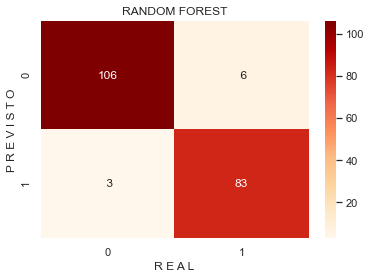

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score,classification_report,cohen_kappa_score
from sklearn.preprocessing import LabelEncoder

#Binary format, with B=0 and M=1
#y = y.replace("B", 0)
#y = y.replace("M", 1)

# Para obter as classes como inteiros, utilizamos
# a classe LabelEncoder da scikit-learn

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(data_normal, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

recall = recall_score(y_test,clf_rf.predict(x_test))
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,clf_rf.predict(x_test))
print('F1 score is: ', f1)
kappa = cohen_kappa_score(y_test,clf_rf.predict(x_test))
print('Kappa is:',kappa)
#cm = confusion_matrix(y_test,clf_rf.predict(x_test))
#ax = sns.heatmap(cm,annot=True,fmt="d")

sns.heatmap(confusion_matrix(y_test, clf_rf.predict(x_test)), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('RANDOM FOREST')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()


In [33]:
print(classification_report(y_test, clf_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       112
           1       0.93      0.97      0.95        86

    accuracy                           0.95       198
   macro avg       0.95      0.96      0.95       198
weighted avg       0.96      0.95      0.95       198



### Predizer apenas uma pessoa

In [34]:
#lista = []
rf_previsoes = clf_rf.predict(x_test[:10])
rf_previsoes

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [35]:
#Tranformar em True/False
previsoes = (rf_previsoes > 0)
previsoes

array([ True,  True, False,  True, False,  True, False, False, False,
        True])